In [17]:
import h5py
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf 
sns.set_theme()

In [18]:
# Reading the h5 file
with h5py.File('train.h5', 'r') as hf:
    X_train = hf['X'][:]
    y_train = hf['y'][:]

#### Picture

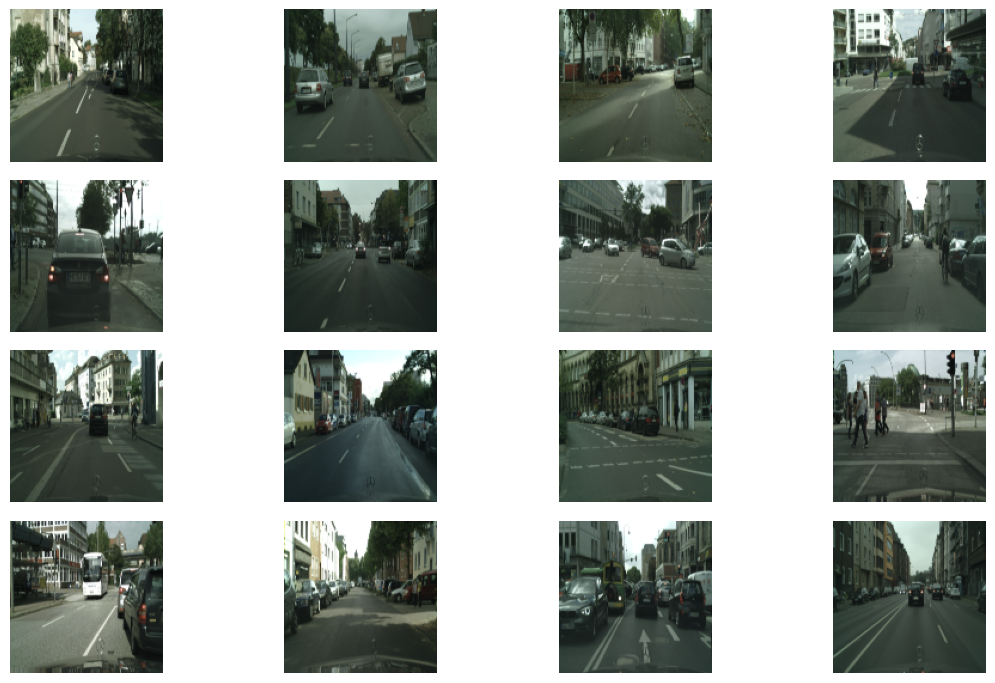

In [19]:
fig, axes = plt.subplots(4,4, figsize=(12, 7))
ax = axes.ravel()
for i in range(16):
#     ax[i].imshow(X_train[i,:,:,0], interpolation='None', cmap='coolwarm') 
    ax[i].imshow(X_train[i], cmap= plt.cm.gray) # show original data
    ax[i].axis("off")
fig.tight_layout()
plt.show()

### Masks

<function matplotlib.pyplot.show(close=None, block=None)>

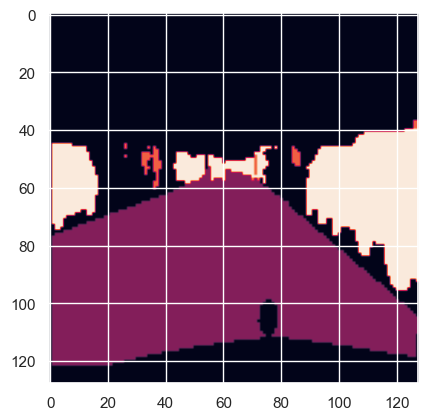

In [20]:
plt.imshow(y_train[300])
plt.show

In [ ]:
a = np.array(y_train[:,:,:].copy())
a_shape = np.shape(a)
list_of_integers = [-1,1,2]
# preprocessing 
for i in range(a_shape[0]):
    for x in range(a.shape[1]):
        for y in range(a.shape[2]):
            pixel = a[i,x,y]
            for value in pixel:
                if value in list_of_integers:
                    pixel[0] = np.array([1])
                else:
                    continue



In [ ]:
plt.imshow(a[300])
plt.show()

In [ ]:
# U-net build
inputs = tf.keras.layers.Input((128,128,3))

In [ ]:
# contraction_path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [ ]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
results = model.fit(X_train,a, 
                    validation_split=0.3, 
                    batch_size=16, 
                    epochs=10)

In [ ]:
# Transfer learning 
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import RMSprop

transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
transfer_model.trainable = False
transfer_model.summary()

model_tr = Sequential([
    transfer_model, 
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(3, 'sigmoid')
])

model_tr.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4), 
              metrics=['accuracy'])


In [ ]:
transfer_history = model_tr.fit(X_train, a,
                                validation_split = 0.3, 
                                batch_size = 16, 
                                epochs = 10 )

In [ ]:
model.evaluate(X_train, a)

In [ ]:
model_tr.evaluate(X_train, a)